In [1]:
#Import all libraries that are required
%matplotlib inline

import numpy as np
import pandas as pd
# pd.options.display.float_formatrmat = '${:,.2f}'.format
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from wordcloud import WordCloud
import wordninja

from io import BytesIO
from requests import get
from PIL import Image, ImageDraw
import instaloader
import pymongo

from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*
from itertools import dropwhile, takewhile
import collections
import requests
import base64

import nltk
from ast import literal_eval
from datetime import timedelta
import string
import statistics
import itertools

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import networkx as nx
from wordcloud import WordCloud

import spacy
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
# from contractions import CONTRACTION_MAP
import unicodedata

import sys
sys.path.append('../')
import Variables as vr

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# create loader object
L = instaloader.Instaloader()
LIST_ALL_USERS = vr.LIST_ALL_USERS

nltk.download('stopwords')
nltk.download('punkt')


USE_LOCAL_DA = True

if (not USE_LOCAL_DA):
    
    # MongoDB Database
    instagramClient = pymongo.MongoClient('157.159.68.107:27017',username='koosha',password='1123581321',authSource='Instagram')
    instagram_db = instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

else:

    # MongoDB Database
    Local_instagramClient = pymongo.MongoClient('127.0.0.1:27017',authSource='Instagram')
    instagram_db = Local_instagramClient["Instagram"]
    instagram_col_post = instagram_db["Post_impersonator_h"]
    instagram_col_comment = instagram_db["Comment_impersonator_h"]
    instagram_col_like = instagram_db["Like_impersonator_h"]
    instagram_col_impersonator = instagram_db["Imp_impersonator_h"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kooshazarei/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load impersonator posts

In [3]:
# impersonator
_limit = 10000
df_impersonator =  pd.DataFrame(list(instagram_col_impersonator.find({
            "$or":
            [
                {'similarity_username': { '$gt': 0.15 }},
                {'similarity_full_name': { '$gt': 0.15 }},
                {'similarity_biography': { '$gt': 0.15 }},
                {'similarity_photo' : True },
            ]    
    
}).limit(_limit) ))
df_impersonator.shape[0]

1829

In [4]:
# df_impersonator = pd.read_csv('Dataset/impersonator_list.csv')
# df_impersonator.shape[0]

In [5]:
# post
_limit = 10000
df_post =  pd.DataFrame(list(instagram_col_post.find({}).limit(_limit) ))
df_post.shape[0]

7477

In [6]:
# df_post = pd.read_csv('Dataset/post_data.csv')
# df_post.shape[0]

# get dataframes

In [7]:
# politician
df_post_trump = df_post.loc[( df_post['associated_username'] == vr.DONALD_TRUMP ) ] 
df_post_obama = df_post.loc[( df_post['associated_username'] == vr.BARACK_OBAMA ) ]
df_post_macron = df_post.loc[( df_post['associated_username'] == vr.EMMANUEL_MACRON ) ]
df_post_johnson = df_post.loc[( df_post['associated_username'] == vr.BORIS_JOHNSON ) ]
df_post_may = df_post.loc[( df_post['associated_username'] == vr.THERESA_MAY ) ]

# sport player
df_post_cristiano_ronalod = df_post.loc[( df_post['associated_username'] == vr.CRISTIANO_RONALDO ) ] 
df_post_leo_messi = df_post.loc[( df_post['associated_username'] == vr.LEOMESSI ) ]
df_post_roger_federer = df_post.loc[( df_post['associated_username'] == vr.ROGER_FEDERER ) ]
df_post_rafael_nadal = df_post.loc[( df_post['associated_username'] == vr.RAFAEL_NADAL ) ]
df_post_djokovic = df_post.loc[( df_post['associated_username'] == vr.NOVAK_DJOKOVIC ) ]

#singers
df_post_lady_gaga = df_post.loc[( df_post['associated_username'] == vr.LADY_GAGA )] 
df_post_beyonce = df_post.loc[( df_post['associated_username'] == vr.BEYONCE ) ] 
df_post_taylor_swift = df_post.loc[( df_post['associated_username'] == vr.TAYLOR_SWIFT ) ] 
df_post_adele = df_post.loc[( df_post['associated_username'] == vr.ADELE ) ] 
df_post_madonna = df_post.loc[( df_post['associated_username'] == vr.MADONNA ) ] 

# Calculate mean

In [8]:
list_all_usecases = [
    df_post_trump, df_post_obama, df_post_macron, df_post_johnson, df_post_may,
    df_post_cristiano_ronalod, df_post_leo_messi, df_post_rafael_nadal, df_post_roger_federer, df_post_djokovic,
    df_post_lady_gaga, df_post_beyonce, df_post_taylor_swift, df_post_adele, df_post_madonna,
]

# Dataframe - Communities

In [9]:
# df_politician.columns

In [10]:
df_politician = pd.concat([df_post_trump, df_post_obama, df_post_macron, df_post_johnson, df_post_may])
df_sportplayer = pd.concat([df_post_cristiano_ronalod, df_post_leo_messi, df_post_rafael_nadal, df_post_roger_federer, df_post_djokovic])
df_musician = pd.concat([df_post_lady_gaga, df_post_beyonce, df_post_taylor_swift, df_post_adele, df_post_madonna])

df_politician['community'] = 'politician'
df_sportplayer['community'] = 'sportplayer'
df_musician['community'] = 'musician'


print("politician: " + str(df_politician.shape[0]))
print("sportplayer: " + str(df_sportplayer.shape[0]))
print("musician: " + str(df_musician.shape[0]))

politician: 1058
sportplayer: 2074
musician: 4240


In [11]:
df_all_post = pd.concat([df_politician, df_sportplayer, df_musician])
df_all_post.shape[0]

7372

In [12]:
df_post_politician = df_politician.dropna(subset=['post_caption'])
df_post_sportplayer = df_sportplayer.dropna(subset=['post_caption'])
df_post_musician = df_musician.dropna(subset=['post_caption'])

In [13]:
df_post_politician.columns

Index(['_id', 'associated_hashtag', 'associated_username',
       'post_associated_hashtag', 'post_associated_username', 'post_caption',
       'post_caption_hashtags', 'post_caption_mentions', 'post_comments',
       'post_date_utc', 'post_is_video', 'post_likes', 'post_location',
       'post_mediaid', 'post_owener_external_url',
       'post_owener_profile_pic_url', 'post_owner_biography',
       'post_owner_external_url', 'post_owner_followees',
       'post_owner_followers', 'post_owner_full_name', 'post_owner_id',
       'post_owner_is_private', 'post_owner_is_verified',
       'post_owner_mediacount', 'post_owner_profile_pic_url',
       'post_owner_similarity_biography', 'post_owner_similarity_full_name',
       'post_owner_similarity_photo', 'post_owner_similarity_username',
       'post_owner_username', 'post_shortcode', 'post_tagged_users',
       'post_thumbnail', 'post_typename', 'post_url', 'post_video_url',
       'post_viewer_has_liked', 'community'],
      dtype='objec

In [14]:
def get_hashtags(_df):    
    hashtags = _df['post_caption_hashtags'].tolist()
    merged = list(np.concatenate(hashtags))
    return merged

list_hashtag_trump = get_hashtags(df_post_trump)
list_hashtag_obama = get_hashtags(df_post_obama)
list_hashtag_macron = get_hashtags(df_post_macron)
list_hashtag_may = get_hashtags(df_post_may)
list_hashtag_johnson = get_hashtags(df_post_johnson)

list_hashtag_messi = get_hashtags(df_post_leo_messi)
list_hashtag_ronaldo = get_hashtags(df_post_cristiano_ronalod)
list_hashtag_nadal = get_hashtags(df_post_rafael_nadal)
list_hashtag_federer = get_hashtags(df_post_roger_federer)
list_hashtag_djokovic = get_hashtags(df_post_djokovic)

list_hashtag_lady_gaga = get_hashtags(df_post_lady_gaga)
list_hashtag_beyonce = get_hashtags(df_post_beyonce)
list_hashtag_taylor_swift = get_hashtags(df_post_taylor_swift)
list_hashtag_madonna = get_hashtags(df_post_madonna)
list_hashtag_adele = get_hashtags(df_post_adele)

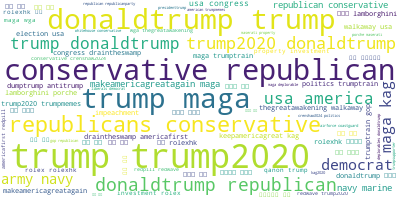

In [15]:

# Join the different processed titles together.
long_string = ','.join(list_hashtag_trump)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [16]:
# del list_hashtag_trump['donaldtrump']
counter=collections.Counter(list_hashtag_trump)
del counter['donaldtrump']  
# print(counter)
# type(counter)
print(counter.most_common(10))

[('trump', 260), ('maga', 244), ('trump2020', 202), ('republican', 178), ('conservative', 169), ('trumptrain', 133), ('usa', 123), ('politics', 112), ('america', 108), ('makeamericagreatagain', 104)]


In [17]:
final_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
final_df.columns = ['from', 'count']
final_df['to'] = 'donaldtrump'
# final_df.head()


# df_filtered = final_df[final_df['count'] > 2]
df_filtered = final_df[:20]

In [18]:
def divide_words(_row):
    
    list_temp = wordninja.split(_row['from'])
    
    final = ""
    for i in list_temp:
        final += " " + i
    _row['from_clean'] = final
    return _row

df_filtered = df_filtered.apply(divide_words, axis=1)

# Create x, where x the 'scores' column's values as floats
x = df_filtered[['count']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.9, 4))

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_filtered['colour'] = x_scaled

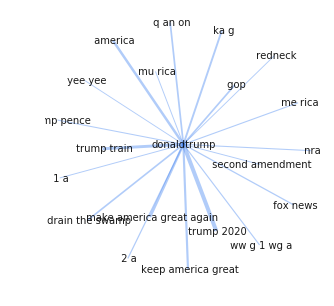

In [19]:
plt.figure(figsize=(5,5))
    

# Build a dataframe with your connections
# df = pd.DataFrame({ 'from':_list_from, 'to':_list_to, 'direction': _list_direction})
# Build your graph
G= nx.from_pandas_edgelist(df_filtered, 'from_clean', 'to', ['count', 'colour'], create_using=nx.Graph() )
# The order of the node for networkX is the following order:
G.nodes()


# # edge_colors = range(2, M + 2)
# edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

# positions for all nodes
pos = nx.spring_layout(G,k=0.1,iterations=300)  
# nodes
nx.draw_networkx_nodes(G, pos, alpha=0.3, node_color='grey', node_size=0)

# edges
# nx.draw_networkx_edges(G, pos, edgelist=elarge, alpha=0.5, width=3, edge_color='red')
edges = nx.draw_networkx_edges(G, pos, alpha=0.4, width=df_filtered['colour'], edge_color=vr.COLOR_POLITICIAN)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif', font_color='black', alpha=0.9)


# for i in range(M):
#     edges[i].set_alpha(0.3)

plt.axis('off')
plt.savefig("plot_04network_P2.pdf", bbox_inches='tight')
plt.show()

# for all use cases

In [20]:
def get_hashtag_network(_df, _hashtag, _to_delete_hashtag):

    counter=collections.Counter(_df)
    
    for item in _to_delete_hashtag:
        del counter[item]
    
    final_df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    final_df.columns = ['from', 'count']
    final_df['to'] = _hashtag
    df_filtered = final_df[:15]
    
    
    x = df_filtered[['count']].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0.9, 5))
    x_scaled = min_max_scaler.fit_transform(x)
    df_filtered['colour'] = x_scaled
    
    
    def divide_words(_row):
        list_temp = wordninja.split(_row['from'])

        final = ""
        for i in list_temp:
            final += " " + i
        _row['from_clean'] = final
        return _row

    df_filtered = df_filtered.apply(divide_words, axis=1)
    return df_filtered

list_delete_hashtags = ['donaldtrump', '1a', 'merica', 'kag', '2a', 'redneck', 'yeeyee', 'gop', 'wwg1wga', 'murica', 'qanon']
df_hashtags_trump = get_hashtag_network(list_hashtag_trump, 'donaldtrump', list_delete_hashtags)

list_delete_hashtags = ['barackobama', 'red',]
df_hashtags_obama = get_hashtag_network(list_hashtag_obama, 'barackobama', list_delete_hashtags)

list_delete_hashtags = ['macron', 'lsf']
df_hashtags_macron = get_hashtag_network(list_hashtag_macron, 'emmanuelmacron', list_delete_hashtags)

list_delete_hashtags = ['theresamay', 'sassy', 'dankmemes', 'lestweforget', 'herno', 'viviennewestwood', 'f4f']
df_hashtags_may = get_hashtag_network(list_hashtag_may, 'theresamay', list_delete_hashtags)

list_delete_hashtags = ['borisjohnson']
df_hashtags_johnson = get_hashtag_network(list_hashtag_johnson, 'borisjohnson', list_delete_hashtags)

list_delete_hashtags = ['leomessi', 'efsanegoller', 'aztagram']
df_hashtags_messi = get_hashtag_network(list_hashtag_messi, 'leomessi', list_delete_hashtags)

list_delete_hashtags = ['cristianoronaldo', 'joya', 'dybalamask', '']
df_hashtags_ronaldo = get_hashtag_network(list_hashtag_ronaldo, 'cristianoronaldo', list_delete_hashtags)

list_delete_hashtags = ['rogerfederer']
df_hashtags_federer = get_hashtag_network(list_hashtag_federer, 'rogerfederer', list_delete_hashtags)

list_delete_hashtags = ['rafaelnadal']
df_hashtags_nadal = get_hashtag_network(list_hashtag_nadal, 'rafaelnadal', list_delete_hashtags)

list_delete_hashtags = ['novakdjokovic']
df_hashtags_djokovic = get_hashtag_network(list_hashtag_djokovic, 'novakdjokovic', list_delete_hashtags)

list_delete_hashtags = ['ladygaga']
df_hashtags_lady_gaga = get_hashtag_network(list_hashtag_lady_gaga, 'ladygaga', list_delete_hashtags)

list_delete_hashtags = ['taylorswift']
df_hashtags_taylor_swift = get_hashtag_network(list_hashtag_taylor_swift, 'taylorswift', list_delete_hashtags)

list_delete_hashtags = ['beyonce', 'b', 'bg']
df_hashtags_beyonce = get_hashtag_network(list_hashtag_beyonce, 'beyonce', list_delete_hashtags)

list_delete_hashtags = ['madonna']
df_hashtags_madonna = get_hashtag_network(list_hashtag_madonna, 'madonna', list_delete_hashtags)

list_delete_hashtags = ['adele', '동성로']
df_hashtags_adele = get_hashtag_network(list_hashtag_adele, 'adele', list_delete_hashtags)
df_hashtags_adele

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

from  count     to    colour   from_clean
0       daily     10  adele  2.722222        daily
1      selfie     15  adele  5.000000      self ie
2   dailylook     10  adele  2.722222   daily look
3        ootd     10  adele  2.722222        oo td
4       유니크아델     10  adele  2.722222             
5          일상     10  adele  2.722222             
6          소통     10  adele  2.722222             
7       셀스타그램     10  adele  2.722222             
8         삼덕동     10  adele  2.722222             
9          아델     10  adele  2.722222             
10      옷스타그램     10  adele  2.722222             
11      친스타그램     13  adele  4.088889             
12       self     10  adele  2.722222         self
13         강남      6  adele  0.900000             
14        해운대      6  adele  0.900000

In [21]:
list_delete_hashtags = ['adele', '동성로', '유니크아델', '일상', '셀스타그램', '술스타그램']
df_hashtags_adele = get_hashtag_network(list_hashtag_adele, 'adele', list_delete_hashtags)
df_hashtags_adele

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


from  count     to    colour   from_clean
0       daily     10  adele  2.722222        daily
1      selfie     15  adele  5.000000      self ie
2   dailylook     10  adele  2.722222   daily look
3        ootd     10  adele  2.722222        oo td
4          소통     10  adele  2.722222             
5         삼덕동     10  adele  2.722222             
6          아델     10  adele  2.722222             
7       옷스타그램     10  adele  2.722222             
8       친스타그램     13  adele  4.088889             
9        self     10  adele  2.722222         self
10         강남      6  adele  0.900000             
11        해운대      6  adele  0.900000             
12         셀피     10  adele  2.722222             
13      핫플레이스      6  adele  0.900000             
14      맛스타그램      9  adele  2.266667

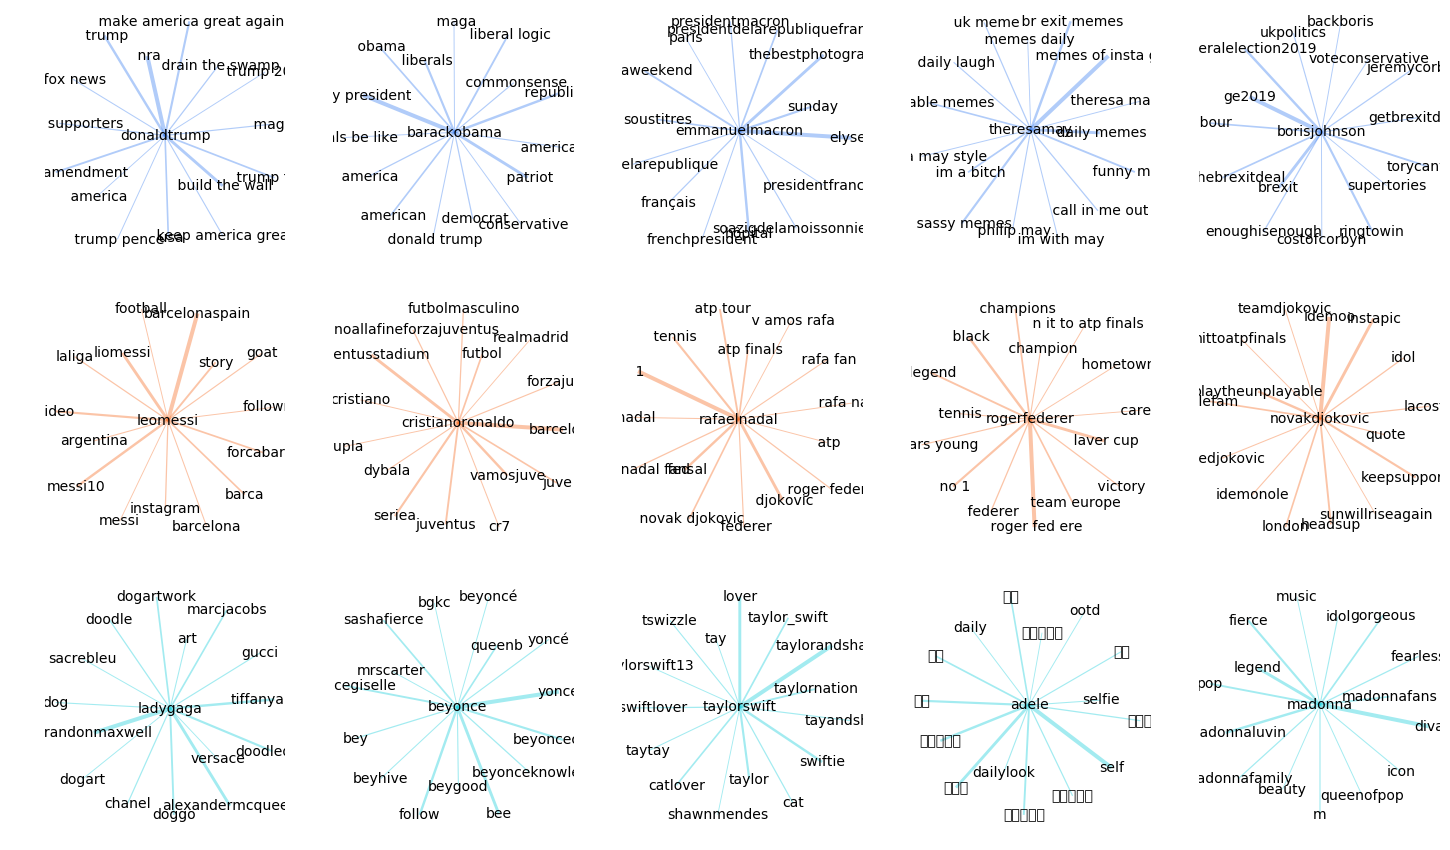

In [22]:
def plot_2():
    fig, ax = plt.subplots(3, 5, figsize=(25,15))

    list_cased = [
        df_hashtags_trump, df_hashtags_obama, df_hashtags_macron, df_hashtags_may, df_hashtags_johnson,
        
        df_hashtags_messi, df_hashtags_ronaldo, df_hashtags_nadal, df_hashtags_federer, df_hashtags_djokovic,
        
        df_hashtags_lady_gaga, df_hashtags_beyonce, df_hashtags_taylor_swift, df_hashtags_adele, df_hashtags_madonna,
    ]

    list_cased_column = [
        'from_clean', 'from_clean', 'from', 'from_clean', 'from',
        'from', 'from', 'from_clean', 'from_clean', 'from',
        
        'from', 'from', 'from', 'from', 'from',
    ]


    counter = 0
    column = 0
    row = 0
    
    for item in list_cased:
        
        if ((column % 5 == 0) & (column > 0 ) ):
            row += 1
            column = 0

        G= nx.from_pandas_edgelist(item, list_cased_column[counter], 'to', ['count'], create_using=nx.Graph() )
        G.nodes()
        pos = nx.spring_layout(G,k=0.1,iterations=100)  
        nx.draw_networkx_nodes(G, pos, alpha=0.3, node_color='grey', node_size=0, ax=ax[row][column])
        nx.draw_networkx_edges(G, pos, alpha=0.4, width=df_filtered['colour'], edge_color=vr.COLORS_COMMUNITIES[row], ax=ax[row][column])
        nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif', font_color='black', alpha=1, ax=ax[row][column])
        ax[row][column].axis('off')
        
        column+=1
        counter +=1
    
    plt.savefig("plot_08hashtag_P2.pdf", bbox_inches='tight')
    
plot_2()

In [23]:
# user_to_hashtags_dict=dict(df[['user_id','hashtags']].values) 
# #a more convenient data structure: a dictionary with users as keys and the list of hashtags they use as values.

#     B=nx.Graph() #create an empty graph
    
#     for user in user_to_hashtags: #loop over all the users
#         for hashtag in user_to_hashtags[user]: #for each user loop over the hashtags they use
#             B.add_edge(user,hashtag) #add the edge User<->hashtag
            
# actual_users_with_hashtags = [x for x in list(set(df.user_id)) if x in B.nodes()] 
# #create a list of users actually appearing in the network - perhaps some tweeting users never used a hashtag and we want to ignore them.

# G = nx.bipartite.weighted_projected_graph(B,nodes =actual_users_with_hashtags) 
# #project the bipartite network onto the the users.